In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, glob
import cv2
from tqdm import tqdm
import PIL

In [2]:
DATADIR = "C:\\railway"
CATEGORIES = ["fall", "not_fall","risky"]

In [3]:
import pathlib
data_dir=pathlib.Path(DATADIR)

In [4]:
data_dir

WindowsPath('C:/railway')

In [5]:
len(list(data_dir.glob('*/*.jpg')))

1390

In [6]:
fall=list(data_dir.glob('fall/*'))
fall[:5]

[WindowsPath('C:/railway/fall/F_01.jpg'),
 WindowsPath('C:/railway/fall/F_02.jpg'),
 WindowsPath('C:/railway/fall/F_03.jpg'),
 WindowsPath('C:/railway/fall/F_04.jpg'),
 WindowsPath('C:/railway/fall/F_05.jpg')]

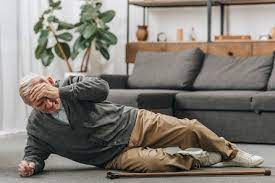

In [7]:
PIL.Image.open(str(fall[52]))

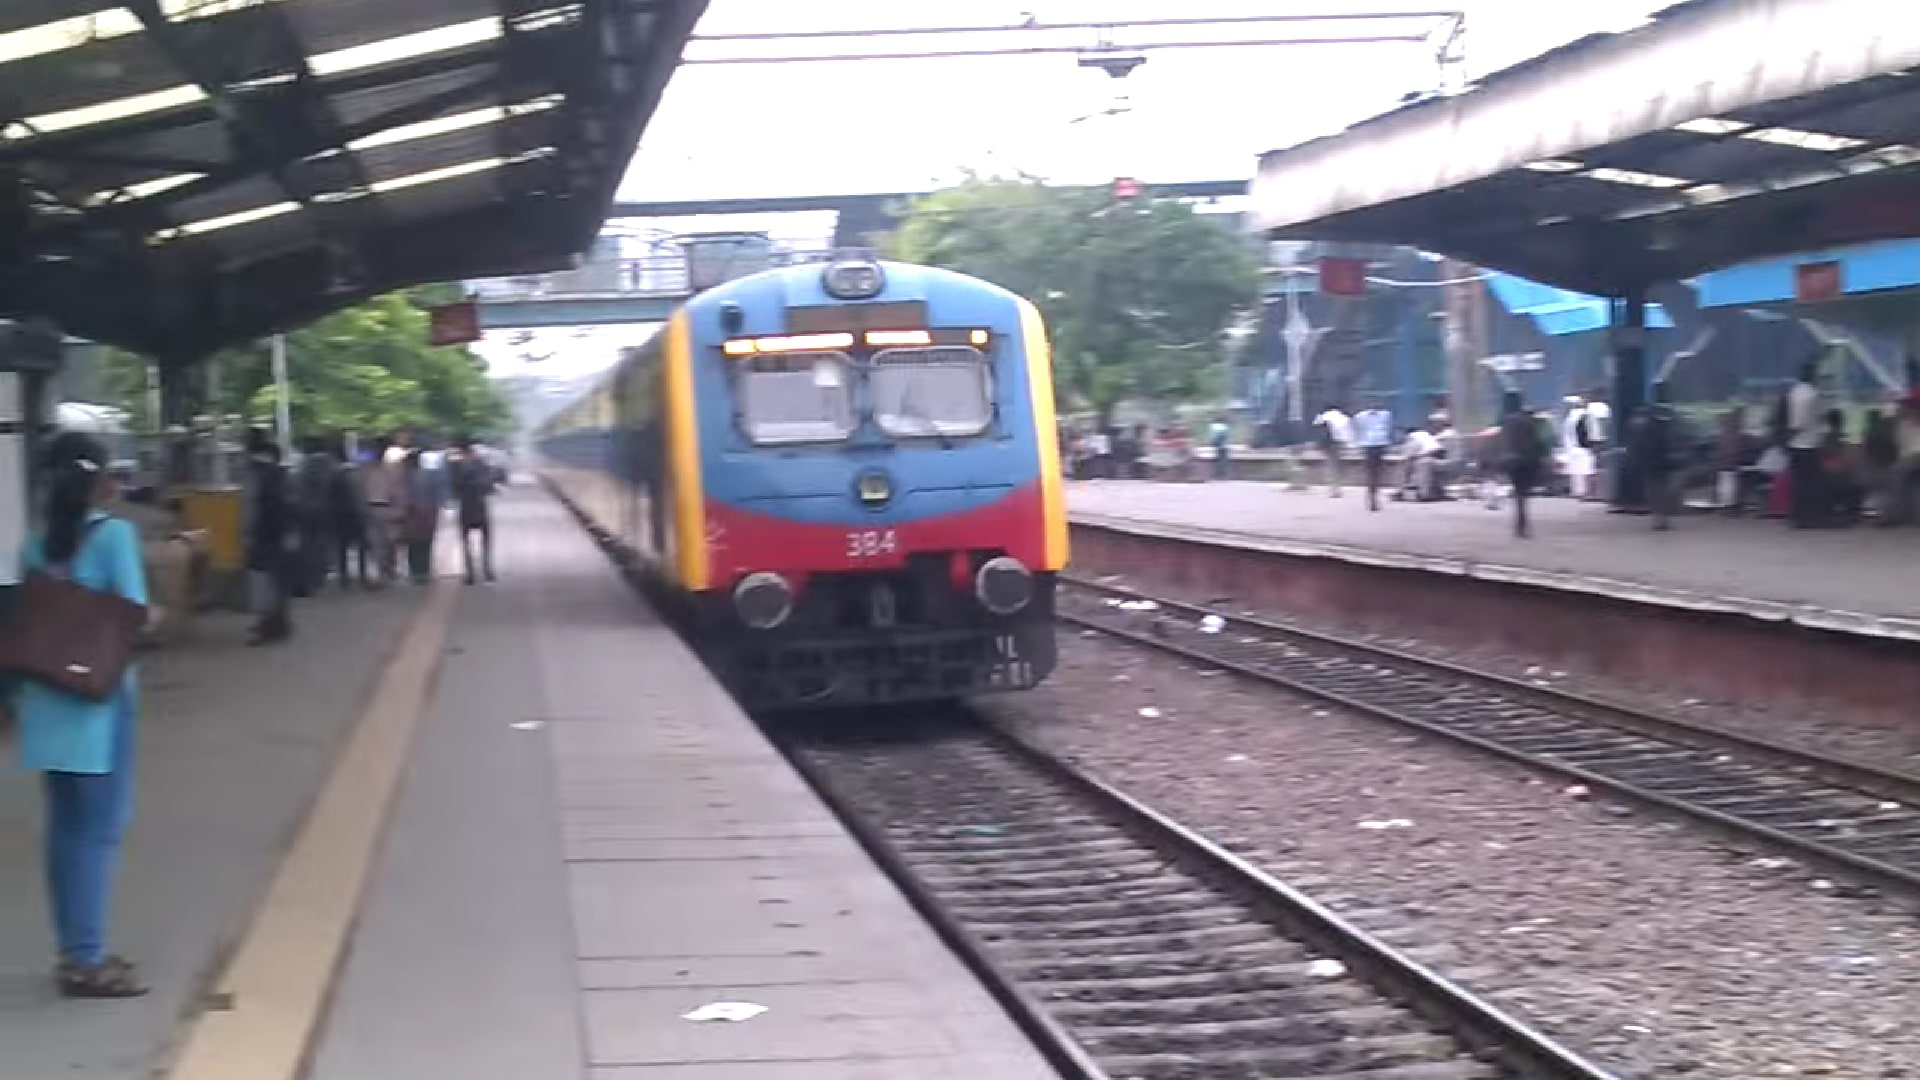

In [8]:
not_fall=list(data_dir.glob('not_fall/*'))
PIL.Image.open(str(not_fall[56]))

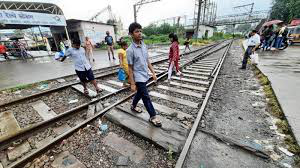

In [9]:
risky=list(data_dir.glob('risky/*'))
PIL.Image.open(str(risky[40]))

In [10]:
railway_images_dict={
    'fall': list(data_dir.glob('fall/*')),
    'not_fall' : list(data_dir.glob('not_fall/*')),
    'risky' : list(data_dir.glob('risky/*'))
}

In [11]:
railway_images_dict['fall']

[WindowsPath('C:/railway/fall/F_01.jpg'),
 WindowsPath('C:/railway/fall/F_02.jpg'),
 WindowsPath('C:/railway/fall/F_03.jpg'),
 WindowsPath('C:/railway/fall/F_04.jpg'),
 WindowsPath('C:/railway/fall/F_05.jpg'),
 WindowsPath('C:/railway/fall/F_06.jpg'),
 WindowsPath('C:/railway/fall/F_07.jpg'),
 WindowsPath('C:/railway/fall/F_08.jpg'),
 WindowsPath('C:/railway/fall/F_09.jpg'),
 WindowsPath('C:/railway/fall/F_10.jpg'),
 WindowsPath('C:/railway/fall/F_100.jpg'),
 WindowsPath('C:/railway/fall/F_101.jpg'),
 WindowsPath('C:/railway/fall/F_102.jpg'),
 WindowsPath('C:/railway/fall/F_103.jpg'),
 WindowsPath('C:/railway/fall/F_104.jpg'),
 WindowsPath('C:/railway/fall/F_105.jpg'),
 WindowsPath('C:/railway/fall/F_106.jpg'),
 WindowsPath('C:/railway/fall/F_107.jpg'),
 WindowsPath('C:/railway/fall/F_108.jpg'),
 WindowsPath('C:/railway/fall/F_109.jpg'),
 WindowsPath('C:/railway/fall/F_11.jpg'),
 WindowsPath('C:/railway/fall/F_110.jpg'),
 WindowsPath('C:/railway/fall/F_111.jpg'),
 WindowsPath('C:/railw

In [12]:
railway_labels_dict = {
    'fall' : 0,
    'not_fall' : 1,
    'risky' : 2
}

In [13]:
X, y = [], []

for category, images in railway_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(256,256))
        X.append(resized_img)
        y.append(railway_labels_dict[category])

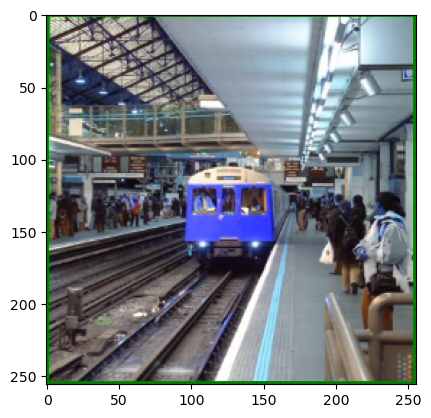

In [14]:
plt.imshow(X[500])

In [15]:
X = np.array(X)
y = np.array(y)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [17]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import datasets, layers, models

In [19]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(256, 256, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

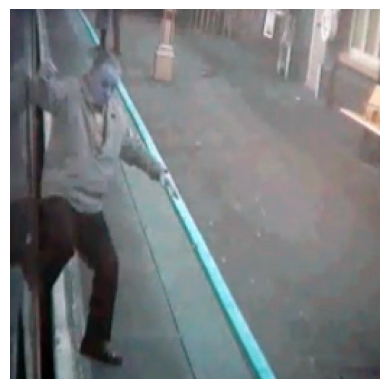

In [20]:
plt.axis('off')
plt.imshow(X[0])

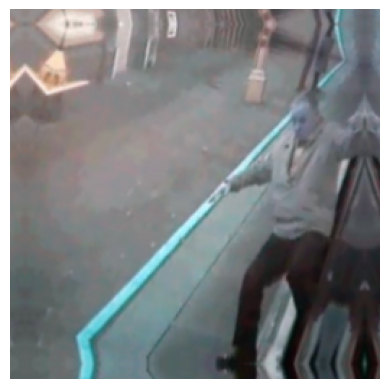

In [21]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [22]:
num_classes = 3

model = Sequential([
  data_augmentation,
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(32, activation='relu'),
  layers.Dropout(0.1),
  layers.Dense(32, activation='relu'),
  layers.Dropout(0.1), 
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)    

Epoch 1/30
33/33 [==============================] - 127s 4s/step - loss: 1.5468 - accuracy: 0.3883
Epoch 2/30
33/33 [==============================] - 117s 4s/step - loss: 1.0701 - accuracy: 0.4056
Epoch 3/30
33/33 [==============================] - 118s 4s/step - loss: 1.0496 - accuracy: 0.4669
Epoch 4/30
33/33 [==============================] - 119s 4s/step - loss: 1.0593 - accuracy: 0.4516
Epoch 5/30
33/33 [==============================] - 118s 4s/step - loss: 0.9771 - accuracy: 0.5216
Epoch 6/30
33/33 [==============================] - 117s 4s/step - loss: 0.9358 - accuracy: 0.5312
Epoch 7/30
33/33 [==============================] - 117s 4s/step - loss: 0.8638 - accuracy: 0.5992
Epoch 8/30
33/33 [==============================] - 115s 3s/step - loss: 0.8671 - accuracy: 0.5868
Epoch 9/30
33/33 [==============================] - 115s 4s/step - loss: 0.8154 - accuracy: 0.6184
Epoch 10/30
33/33 [==============================] - 115s 3s/step - loss: 0.8045 - accuracy: 0.6500
Epoch 11/

In [23]:
model.evaluate(X_test_scaled,y_test)

11/11 [==============================] - 6s 536ms/step - loss: 0.7168 - accuracy: 0.7299


[0.716848611831665, 0.7298850417137146]

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 128)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 524288)           

In [25]:
import os.path
model.save('railway_model.h5')